In [2]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick



# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('else')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   306429 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last_Update      306429 non-null  datetime64[ns]
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 18.7+ MB


In [4]:
df.head()

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


## **Note**
---

## **1. Definition**

| Measure                     | What it calculates                                                             | Units                                             |
| --------------------------- | ------------------------------------------------------------------------------ | ------------------------------------------------- |
| **Variance**                | Average of squared deviations from the mean. Shows **overall spread** of data. | Squared units of the original data (e.g., cases²) |
| **Standard Deviation (SD)** | Square root of variance. Shows **typical deviation from the mean**.            | Same units as the original data (e.g., cases)     |

**Key point:** SD is easier to interpret because it’s in the same unit as your daily cases, while variance is in squared units and less intuitive.

---

## **2. How They Reflect Volatility**

* **Variance:**

  * Larger variance → bigger fluctuations in daily cases.
  * Harder to interpret directly because it’s squared.
* **Standard Deviation:**

  * Tells you **on average how far daily cases deviate from the mean**.
  * High SD → daily cases jump a lot from the average → unstable outbreak.
  * Low SD → daily cases stay close to the average → stable outbreak.

**Example:**
Suppose a country has daily new cases: [100, 200, 150, 250, 100]

* Mean = 160
* Variance = 3,000 → not very intuitive
* SD = √3,000 ≈ 54.8 → easier to say “daily cases typically deviate ±55 from the mean of 160.”

---

In [5]:
# filter only US data
df_US= df[df['Country/Region'] == 'US']

In [6]:
# DISCOVER wich State was more confirmed by COVID-19 in US
country_Confirmed = df_US.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=0)
country_Confirmed

Province/State
California                696898013.0
Texas                     552039886.0
Florida                   429469197.0
New York                  380636880.0
Illinois                  263055187.0
                             ...     
Shasta County, CA                 1.0
Spartanburg County, SC            1.0
American Samoa                    0.0
Montgomery County, TX             0.0
Recovered                         0.0
Name: Confirmed, Length: 199, dtype: float64

In [7]:
df_California= df[df['Province/State'] == 'California'] # California data only
df_Texas= df[df['Province/State'] == 'Texas'] # Texas data only
df_Florida= df[df['Province/State'] == 'Florida'] # Florida data only

In [8]:
df_melt= pd.concat([df_California, df_Texas, df_Florida])
df_melt_2021= df_melt[df_melt['ObservationDate'].dt.year == 2021]
df_melt_2021

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
192715,2021-01-01,California,US,2021-04-02 15:13:53,2365024.0,26504.0,0.0
193478,2021-01-02,California,US,2021-04-02 15:13:53,2415246.0,26696.0,0.0
194241,2021-01-03,California,US,2021-04-02 15:13:53,2452262.0,26788.0,0.0
195005,2021-01-04,California,US,2021-04-02 15:13:53,2490518.0,27160.0,0.0
195769,2021-01-05,California,US,2021-04-02 15:13:53,2529480.0,27684.0,0.0
...,...,...,...,...,...,...,...
302920,2021-05-25,Florida,US,2021-05-26 04:20:35,2313815.0,36581.0,0.0
303685,2021-05-26,Florida,US,2021-05-27 04:20:59,2316142.0,36647.0,0.0
304450,2021-05-27,Florida,US,2021-05-28 04:20:36,2318480.0,36733.0,0.0


In [9]:
df_melt_2021['Month'] = df_melt_2021['ObservationDate'].dt.strftime('%b')
df_melt_2021

C:\Users\go\AppData\Local\Temp\ipykernel_2320\3087479546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt_2021['Month'] = df_melt_2021['ObservationDate'].dt.strftime('%b')


,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered,Month
SNo,,,,,,,,
192715,2021-01-01,California,US,2021-04-02 15:13:53,2365024.0,26504.0,0.0,Jan
193478,2021-01-02,California,US,2021-04-02 15:13:53,2415246.0,26696.0,0.0,Jan
194241,2021-01-03,California,US,2021-04-02 15:13:53,2452262.0,26788.0,0.0,Jan
195005,2021-01-04,California,US,2021-04-02 15:13:53,2490518.0,27160.0,0.0,Jan
195769,2021-01-05,California,US,2021-04-02 15:13:53,2529480.0,27684.0,0.0,Jan
...,...,...,...,...,...,...,...,...
302920,2021-05-25,Florida,US,2021-05-26 04:20:35,2313815.0,36581.0,0.0,May
303685,2021-05-26,Florida,US,2021-05-27 04:20:59,2316142.0,36647.0,0.0,May
304450,2021-05-27,Florida,US,2021-05-28 04:20:36,2318480.0,36733.0,0.0,May


In [10]:
df_pivot= df_melt_2021.pivot_table(index='Month', columns='Province/State', values='Deaths', aggfunc='sum').sort_index()
df_pivot= df_pivot.reset_index()
df_pivot['Month_no'] = df_pivot['Month'].apply(lambda x: pd.to_datetime(x, format='%b').month)
df_pivot = df_pivot.sort_values('Month_no').reset_index(drop=True)
df_pivot=df_pivot.set_index('Month')
df_pivot= df_pivot.drop(columns=['Month_no'])
df_pivot

Province/State,California,Florida,Texas
Month,,,
Jan,1037049.0,743830.0,1004295.0
Feb,1331745.0,808595.0,1145253.0
Mar,1753846.0,1002736.0,1442795.0
Apr,1821910.0,1029258.0,1482519.0
May,1814850.0,1045228.0,1475981.0


In [11]:
df_pivot['mean_number_of_deaths']= df_pivot.mean(axis=1)
df_pivot

Province/State,California,Florida,Texas,mean_number_of_deaths
Month,,,,
Jan,1037049.0,743830.0,1004295.0,9.283913e+05
Feb,1331745.0,808595.0,1145253.0,1.095198e+06
Mar,1753846.0,1002736.0,1442795.0,1.399792e+06
Apr,1821910.0,1029258.0,1482519.0,1.444562e+06
May,1814850.0,1045228.0,1475981.0,1.445353e+06


C:\Users\go\AppData\Local\Temp\ipykernel_2320\2481870751.py:1: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  df_plot= sns.lineplot(data=df_pivot, markers='o', palette='mako')


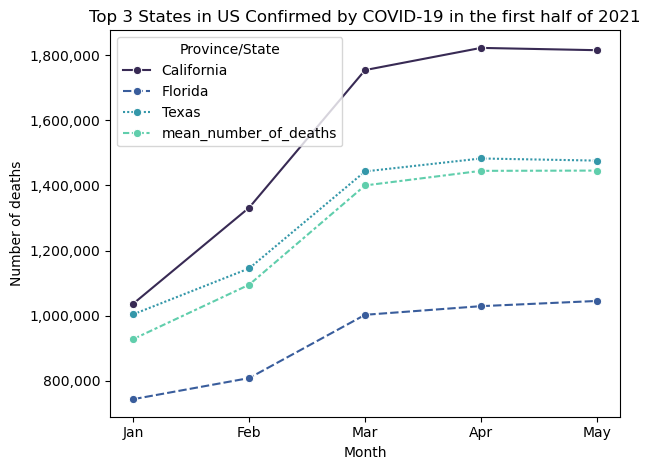

In [12]:
df_plot= sns.lineplot(data=df_pivot, markers='o', palette='mako')

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Top 3 States in US Confirmed by COVID-19 in the first half of 2021')
df_plot.set_ylabel('Number of deaths')
plt.tight_layout()
plt.show()